In [1]:
pip install pymystem3

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pymystem3 import Mystem
m = Mystem()

In [4]:
def opening():
    with open('groza.txt', encoding = 'utf-8') as f:
        text = f.read()
    return text
text = opening()

In [5]:
import time
def parsing(text):
    start = time.time()
    ana = m.analyze(text)
    end = time.time()
    print('Время работы: ', end - start, 'сек.')
    return ana
ana = parsing(text)

Время работы:  1.9148781299591064 сек.


In [6]:
import json
def write(ana):
    with open('new.json','w',encoding = 'utf-8') as d:
        json_ana = json.dump(ana, d, ensure_ascii=False)
    return json_ana
json_ana = write(ana)

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ico/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.tokenize import word_tokenize
def token(text):
    token_text = [w.lower() for w in word_tokenize(text) if w.isalpha()]
    return token_text
token_text = token(text)

In [10]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [11]:
import time
def pymorphh(token_text):
    data =  []
    start = time.time()
    for word in token_text:
        data.append(morph.parse(word))
    end = time.time()
    print('Время работы: ', end - start, 'сек.')
    return data
data = pymorphh(token_text)

Время работы:  2.7525131702423096 сек.


In [12]:
def lemmas(data):
    
    kok = list(data)
    k_str = ' '.join(str(x) for x in kok)
    ana_2 = k_str.split(', ')
    return ana_2
ana_2 = lemmas(data)

In [13]:
import json
def file_2(ana_2):
    with open('new_2.json','w',encoding = 'utf-8') as d:
        json_ana = json.dump(ana_2, d, ensure_ascii=False)
    return json_ana
json_ana = file_2(ana_2)

In [21]:
def counting(token_text):
    d = {}
    verbs = []
    adverbs = []
    len_text = len(token_text)
    for i in range(len(token_text)):
        w = morph.parse(token_text[i])[0]
        if w.tag.POS in d:
            d[w.tag.POS] += 1
        else:
            d[w.tag.POS] = 1
        if w.tag.POS == 'VERB':
            verbs.append(w.normal_form)
        elif w.tag.POS == 'ADVB':
            adverbs.append(w.normal_form)
            verbs.append(w.normal_form)
    for key in d:
        print('Часть речи - ',key, 'доля в тексте - ', round(d[key] / len_text * 100),'%')
    return d
d = counting(token_text)
counting(token_text)

Часть речи -  NOUN доля в тексте -  21 %
Часть речи -  ADJF доля в тексте -  7 %
Часть речи -  PREP доля в тексте -  8 %
Часть речи -  NUMR доля в тексте -  0 %
Часть речи -  CONJ доля в тексте -  14 %
Часть речи -  ADVB доля в тексте -  6 %
Часть речи -  VERB доля в тексте -  15 %
Часть речи -  INFN доля в тексте -  3 %
Часть речи -  ADJS доля в тексте -  1 %
Часть речи -  PRCL доля в тексте -  10 %
Часть речи -  NPRO доля в тексте -  12 %
Часть речи -  GRND доля в тексте -  1 %
Часть речи -  PRTS доля в тексте -  0 %
Часть речи -  INTJ доля в тексте -  1 %
Часть речи -  PRED доля в тексте -  1 %
Часть речи -  COMP доля в тексте -  1 %
Часть речи -  PRTF доля в тексте -  0 %
Часть речи -  None доля в тексте -  0 %
Часть речи -  NOUN доля в тексте -  21 %
Часть речи -  ADJF доля в тексте -  7 %
Часть речи -  PREP доля в тексте -  8 %
Часть речи -  NUMR доля в тексте -  0 %
Часть речи -  CONJ доля в тексте -  14 %
Часть речи -  ADVB доля в тексте -  6 %
Часть речи -  VERB доля в тексте 

{'NOUN': 3117,
 'ADJF': 996,
 'PREP': 1169,
 'NUMR': 25,
 'CONJ': 1987,
 'ADVB': 843,
 'VERB': 2166,
 'INFN': 424,
 'ADJS': 126,
 'PRCL': 1441,
 'NPRO': 1782,
 'GRND': 76,
 'PRTS': 22,
 'INTJ': 101,
 'PRED': 162,
 'COMP': 83,
 'PRTF': 8,
 None: 1}

In [17]:
def popular_verbs(token_text):
    d = {}
    verbs = []
    len_text = len(token_text)
    for i in range(len(token_text)):
        w = morph.parse(token_text[i])[0]
        if w.tag.POS == 'VERB':
            verbs.append(w.normal_form)
    top20 = Counter(verbs).most_common(20)
    print('Топ-20 частотных глаголов:')
    for k in top20:
        print(k[0])
popular_verbs(token_text)

Топ-20 частотных глаголов:
быть
знать
хотеть
говорить
мочь
видеть
пойти
любить
уходить
стать
бояться
входить
идти
сказать
делать
прийти
думать
смотреть
сделать
гулять


In [19]:
from collections import Counter
def popular_adverbs(token_text):
    d = {}
    adverbs = []
    len_text = len(token_text)
    for i in range(len(token_text)):
        w = morph.parse(token_text[i])[0]
        if w.tag.POS == 'ADVB':
            adverbs.append(w.normal_form)
    top20 = Counter(adverbs).most_common(20)
    print('Топ-20 частотных наречий:')
    for k in top20:
        print(k[0])
popular_adverbs(token_text)

Топ-20 частотных наречий:
уж
теперь
здесь
точно
там
тут
где
домой
зачем
хорошо
тоже
потом
очень
несколько
мало
никогда
сюда
тогда
потому
совсем


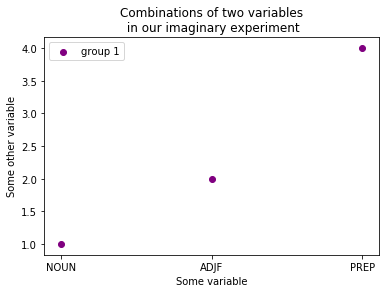

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
#print(d.keys())
#X = d.keys()
#Y = d.values()
X = ['NOUN', 'ADJF', 'PREP']
Y = [1, 2, 4]
plt.scatter(X, Y, color='purple', label='group 1') 
plt.title('Combinations of two variables\n in our imaginary experiment') 
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.legend(loc='best') 
plt.show()

In [48]:
import pandas as pd

dictionary = {'name': ['Джон', 'Мария', 'Алекс'], 'age': [21, 29, 35]}

df = pd.DataFrame(dictionary)

df

,name,age
0,Джон,21
1,Мария,29
2,Алекс,35
